In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elevator-predictive-maintenance-dataset/predictive-maintenance-dataset.csv


# Elevator Maintenance Prediction

## Load Data

In [2]:
#create dataframe
Df = pd.read_csv('/kaggle/input/elevator-predictive-maintenance-dataset/predictive-maintenance-dataset.csv')
Df

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,1,93.744,73.999,18.00,167.743,19.745,1.266828,8787.937536,5475.852001
1,2,93.740,73.999,18.00,167.739,19.741,1.266774,8787.187600,5475.852001
2,3,93.736,73.998,18.00,167.734,19.738,1.266737,8786.437696,5475.704004
3,4,93.732,73.998,18.00,167.730,19.734,1.266683,8785.687824,5475.704004
4,5,93.729,73.998,18.00,167.727,19.731,1.266642,8785.125441,5475.704004
...,...,...,...,...,...,...,...,...,...
111996,111997,20.186,73.992,2.00,94.178,-53.806,0.272813,407.474596,5474.816064
111997,111998,20.186,73.992,20.01,94.178,-53.806,0.272813,407.474596,5474.816064
111998,111999,20.185,73.992,20.01,94.177,-53.807,0.272800,407.434225,5474.816064
111999,112000,20.185,73.992,20.00,94.177,-53.807,0.272800,407.434225,5474.816064


In [3]:
Df = Df.drop('ID', axis=1)
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   revolutions  112001 non-null  float64
 1   humidity     112001 non-null  float64
 2   vibration    109563 non-null  float64
 3   x1           112001 non-null  float64
 4   x2           112001 non-null  float64
 5   x3           112001 non-null  float64
 6   x4           112001 non-null  float64
 7   x5           112001 non-null  float64
dtypes: float64(8)
memory usage: 6.8 MB


In [4]:
Df.describe()

,revolutions,humidity,vibration,x1,x2,x3,x4,x5
count,112001.000000,112001.000000,109563.000000,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000
mean,46.275195,74.224140,28.340276,120.499335,-27.948945,0.623759,2503.994994,5509.691804
std,19.042179,0.684711,24.292500,18.984921,19.123796,0.258677,1874.972912,101.395621
min,16.933000,72.399000,2.000000,90.132000,-56.353000,0.231328,286.726489,5241.615201
25%,29.651000,73.914000,8.000000,103.850000,-44.548000,0.399615,879.181801,5463.279396
50%,43.348000,74.212000,21.280000,117.640000,-31.443000,0.580561,1879.049104,5507.420944
75%,63.997000,74.731000,39.210000,138.119000,-10.012000,0.865330,4095.616009,5584.722361
max,93.744000,75.400000,100.000000,167.743000,19.745000,1.266828,8787.937536,5685.160000


## Data Pre Processing

### Remove the null values

In [5]:
print(Df.isnull().sum())
Df.dropna(inplace=True)

Df.shape

revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64


(109563, 8)

### Include the maintenance column

In [6]:
# Define the threshold for vibration
threshold = 17.0  # Adjust the threshold value based on your dataset and domain knowledge

# Add the target variable column
Df['maintenance'] = (Df['vibration'] > threshold).astype(int)

# Check the updated dataset
Df.tail()

,revolutions,humidity,vibration,x1,x2,x3,x4,x5,maintenance
111996,20.186,73.992,2.00,94.178,-53.806,0.272813,407.474596,5474.816064,0
111997,20.186,73.992,20.01,94.178,-53.806,0.272813,407.474596,5474.816064,1
111998,20.185,73.992,20.01,94.177,-53.807,0.272800,407.434225,5474.816064,1
111999,20.185,73.992,20.00,94.177,-53.807,0.272800,407.434225,5474.816064,1
112000,20.184,73.992,2.00,94.176,-53.808,0.272786,407.393856,5474.816064,0


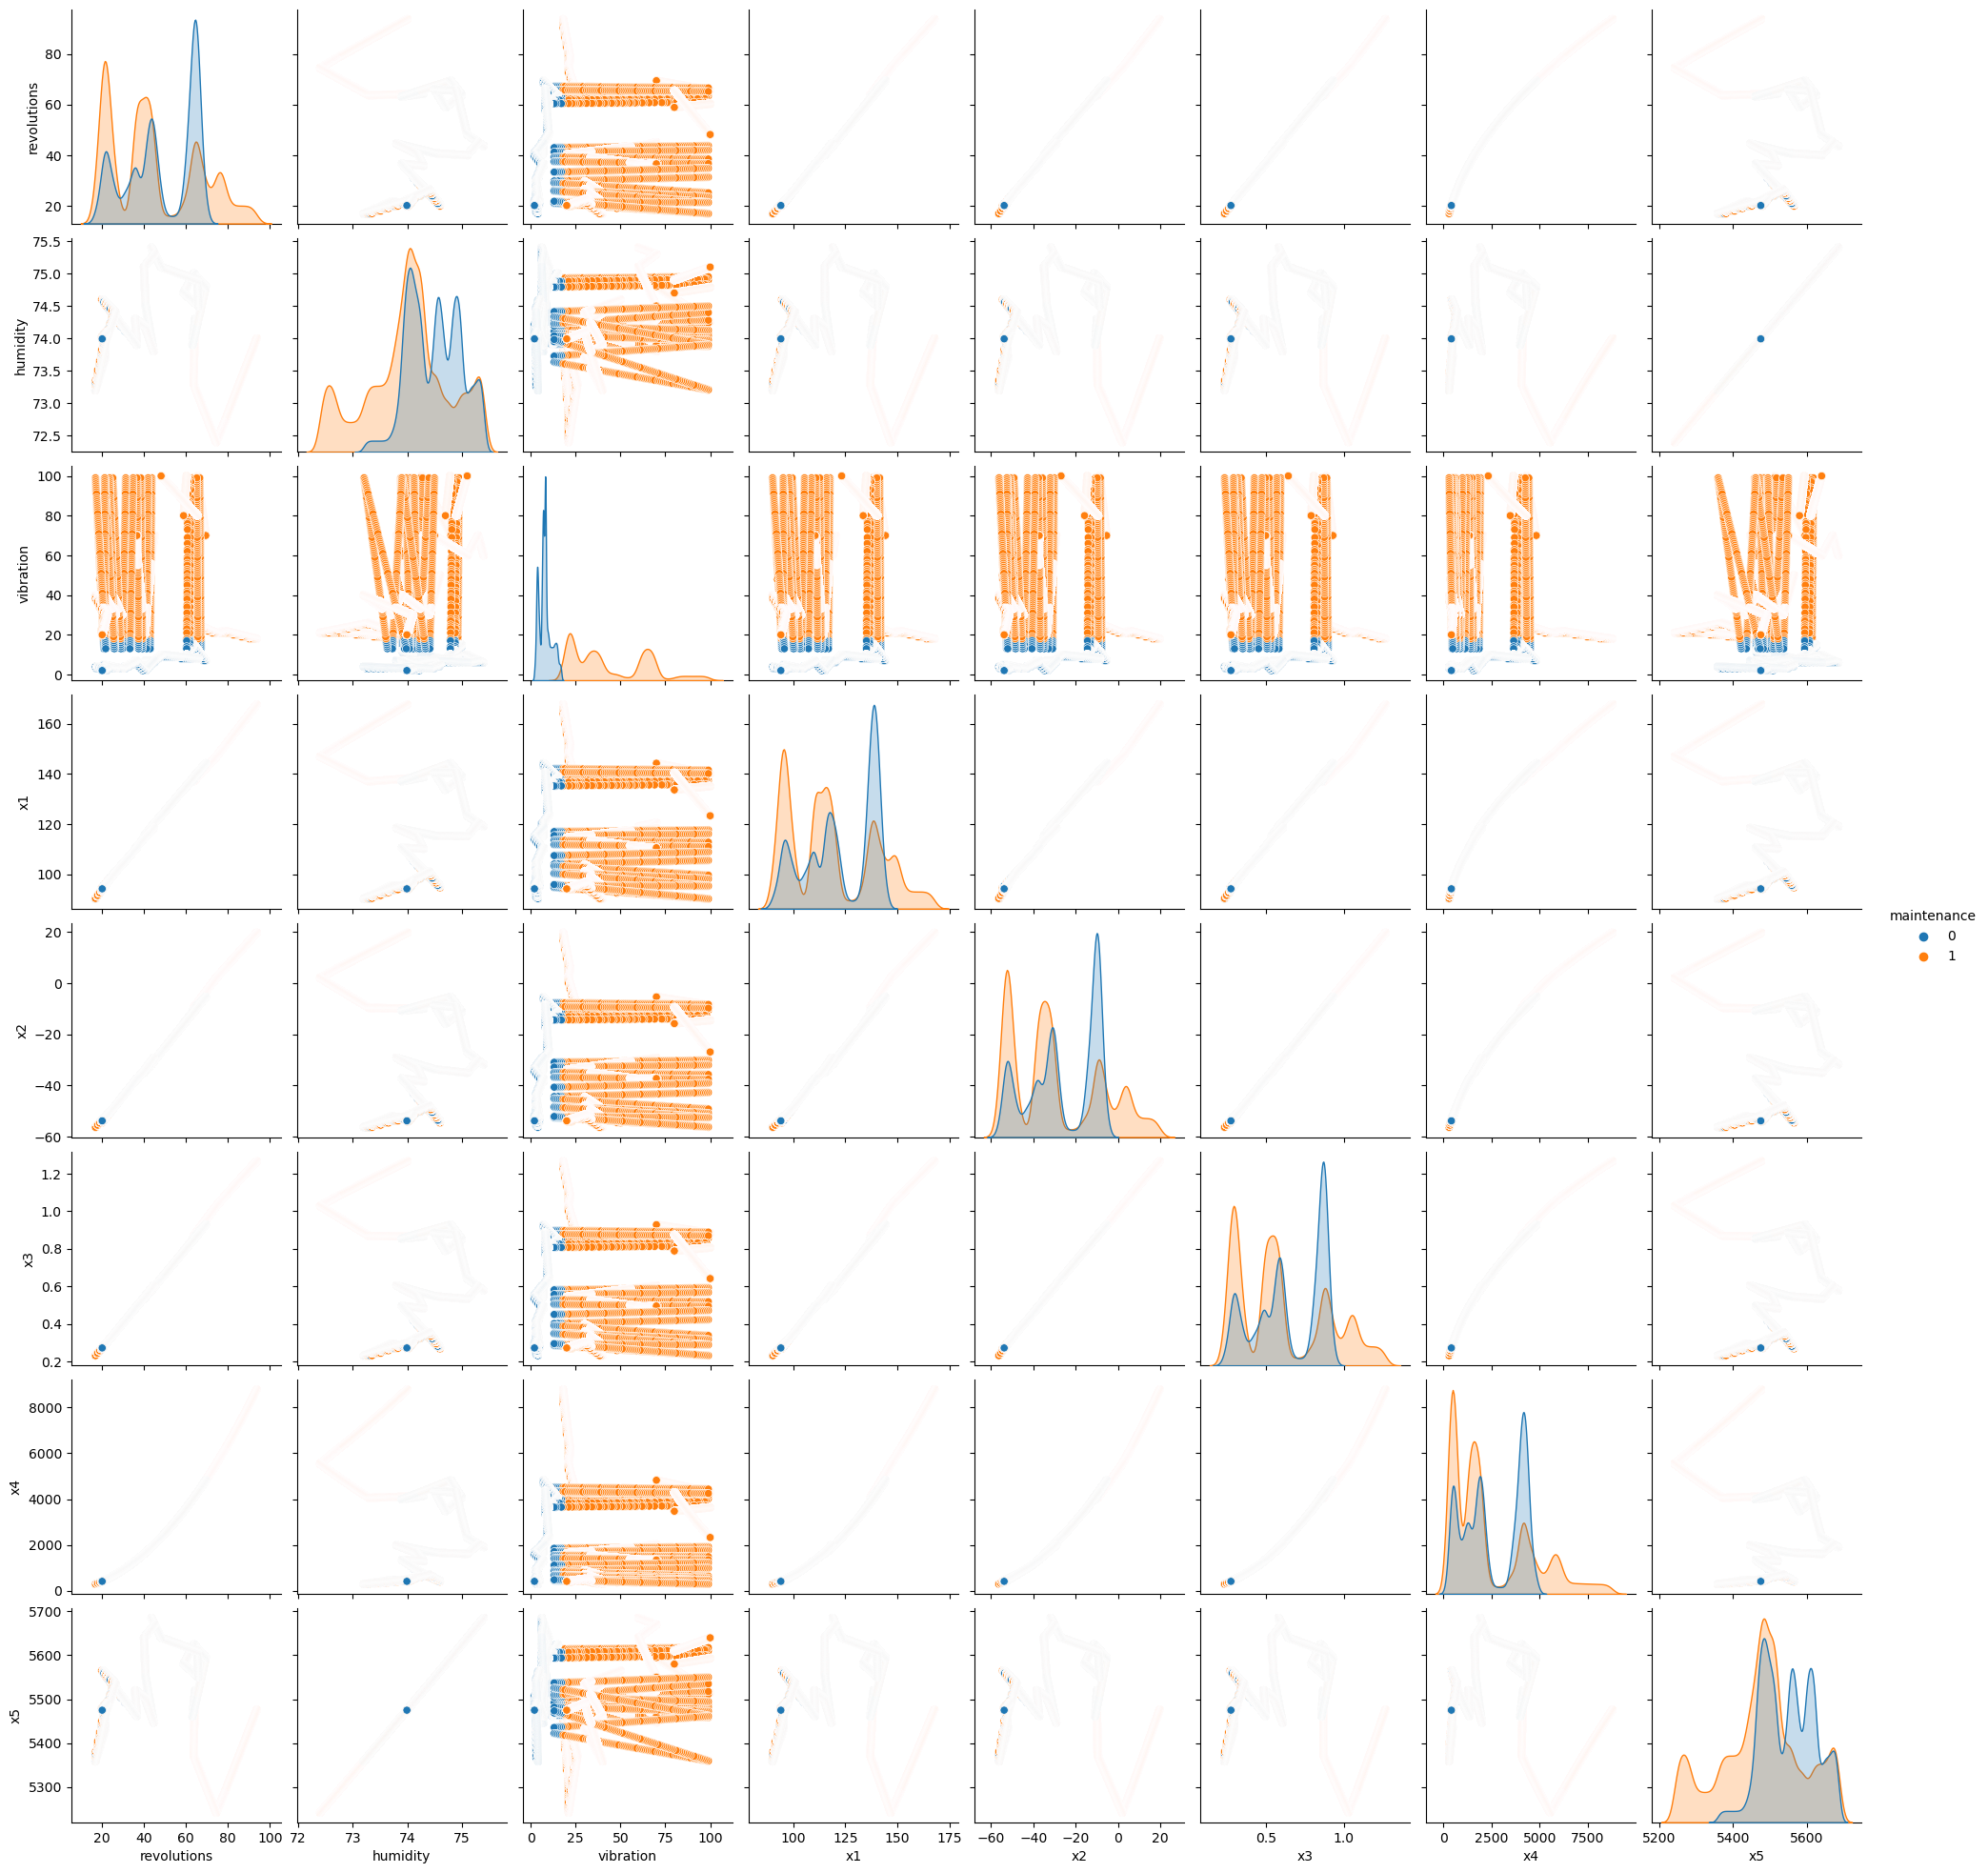

In [7]:
sns.pairplot(Df, hue='maintenance')

### Normalize and Standardization

In [8]:
from sklearn.model_selection import train_test_split
# Separate the features and target variable
x = Df.drop ('maintenance' , axis=1)
y = Df['maintenance']


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize the x
scaler = MinMaxScaler() 
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

#standardization the x
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))
print(Df.tail(5))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        revolutions  humidity  vibration      x1      x2        x3  \
111996       20.186    73.992       2.00  94.178 -53.806  0.272813   
111997       20.186    73.992      20.01  94.178 -53.806  0.272813   
111998       20.185    73.992      20.01  94.177 -53.807  0.272800   
111999       20.185    73.992      20.00  94.177 -53.807  0.272800   
112000       20.184    73.992       2.00  94.176 -53.808  0.272786   

                x4           x5  maintenance  
111996  407.474596  5474.816064            0  
111997  407.474596  5474.816064            1  
111998  407.434225  5474.816064            1  
111999  407.434225  5474.816064            1  
112000  407.393856  5474.816064            0  


In [10]:
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (87650, 8)
X_test :  (21913, 8)
y_train :  (87650,)
y_test :  (21913,)


# Finding the best training algorithm

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

## K-Nearest Neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9985853146534021

## Naive Bayes 

In [14]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test,y_test)

0.9713868479897778

## Support Vector Machine

In [16]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test,y_test)

0.9961666590608315

# Using Random forest

In [19]:
#confusionMatrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Make Prediction on test data
y_pred = model.predict(X_test)

# Model Evaluation
ac_sc = accuracy_score(y_test, y_pred)
rc_sc = recall_score(y_test, y_pred, average="weighted")
pr_sc = precision_score(y_test, y_pred, average="weighted")
f1_sc = f1_score(y_test, y_pred, average='micro')
confusion_m = confusion_matrix(y_test, y_pred)

print("========== Result of Random forest  ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Result of Random forest  ==========
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[ 9405     0]
 [    0 12508]]


In [20]:
result = pd.DataFrame(data=[y_test.values,y_pred], index = ['y_test','y_pred'])
result.transpose()

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
21908,1,1
21909,1,1
21910,1,1
21911,1,1
